In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json
import ast


# Brief analysis of the data

In [75]:
movie_metadata = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None , 
names=['WikiID', 'FreebaseID', 'Name', 'Release', 'BoxRevenue', 'Runtime', 'Languages', 'Countries', 'Genres'])
movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [76]:
movie_metadata["Release"] = movie_metadata["Release"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
movie_metadata["Countries"] = movie_metadata["Countries"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Languages"] = movie_metadata["Languages"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Genres"] = movie_metadata["Genres"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)


movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)

In [77]:
processed = movie_metadata
processed = processed.explode(column="Countries")
processed.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],Norway,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],United Kingdom,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],Germany,[Drama]


In [78]:
processed.groupby(by="Countries")["Name"].count().nlargest(10, "all").sort_values(ascending=False)

Countries
United States of America    34408
India                        8411
United Kingdom               7868
France                       4395
Italy                        3163
Japan                        2647
Canada                       2534
Germany                      2393
Argentina                    1468
Hong Kong                    1240
Name: Name, dtype: int64

In [33]:
#processed.groupby(by="Countries")["Name"].count()[processed.groupby(by="Countries")["Name"].count().apply(lambda x: x>100)].sort_values(ascending=False)

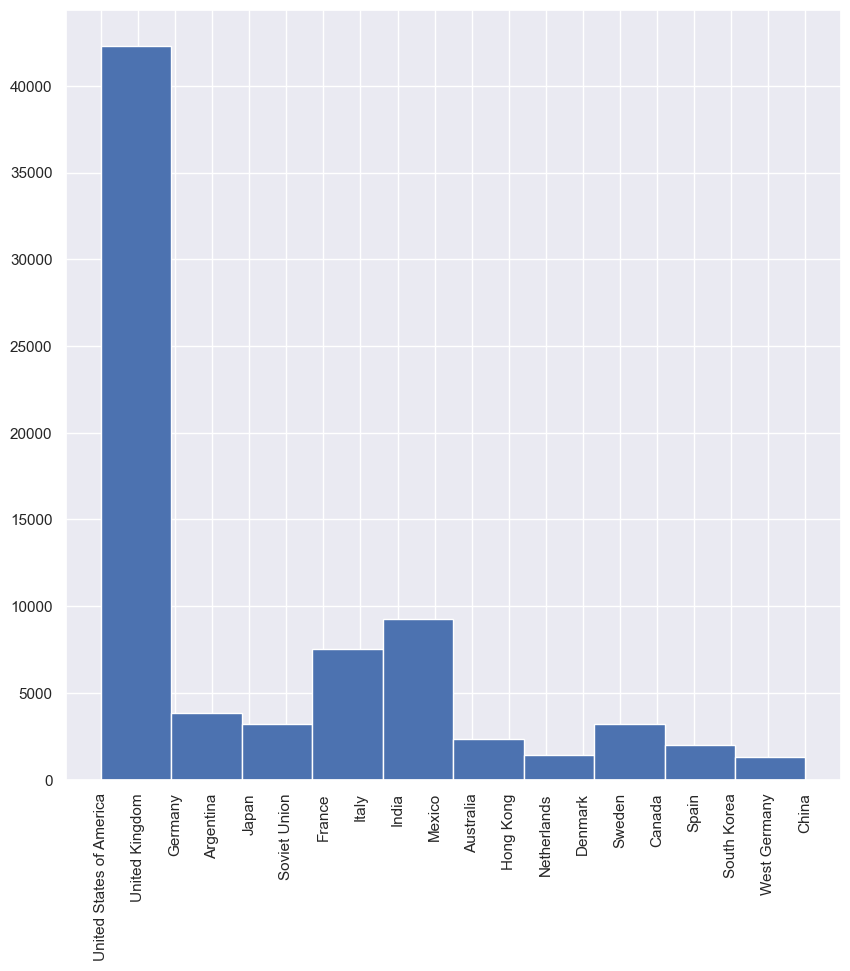

In [94]:
k = processed.groupby(by="Countries")["Name"].count().nlargest(20).index
pruned = processed[processed["Countries"].apply(lambda x: x in k)]
#sns.histplot(data= pruned, y="Countries")
pruned["Countries"].hist()
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")


<AxesSubplot:xlabel='Release', ylabel='Countries'>

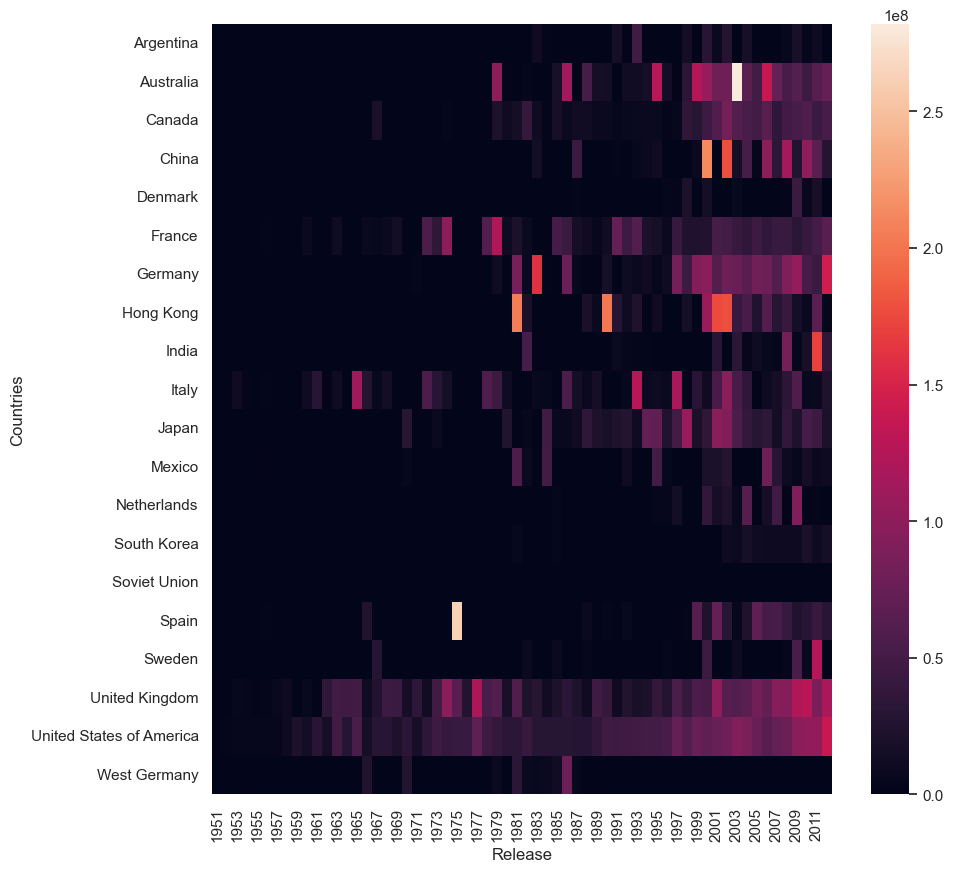

In [80]:
temp = pruned.pivot_table(index = 'Countries', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
temp = temp.loc[:, temp.apply(lambda x: int(x.name)>1950, axis = 0)]

sns.heatmap(temp)

<AxesSubplot:ylabel='Genres'>

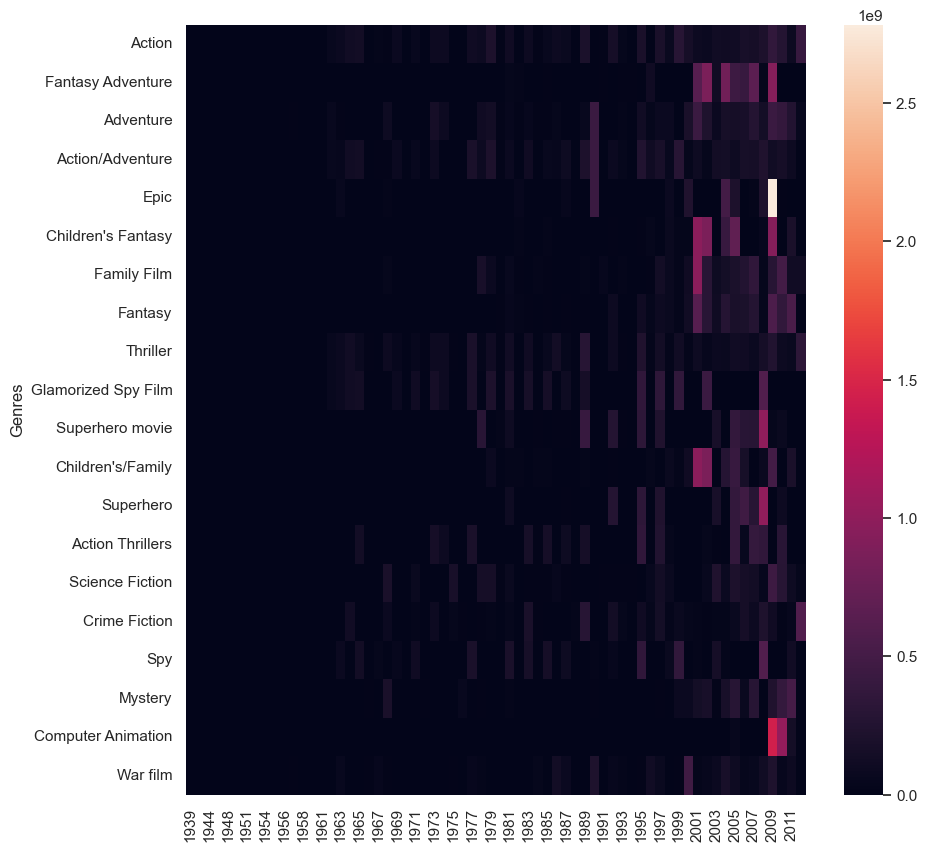

In [81]:
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United Kingdom" )].explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
d = tmp.apply(lambda x: sum(x), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
#tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
sns.heatmap(tmp)

<AxesSubplot:ylabel='Genres'>

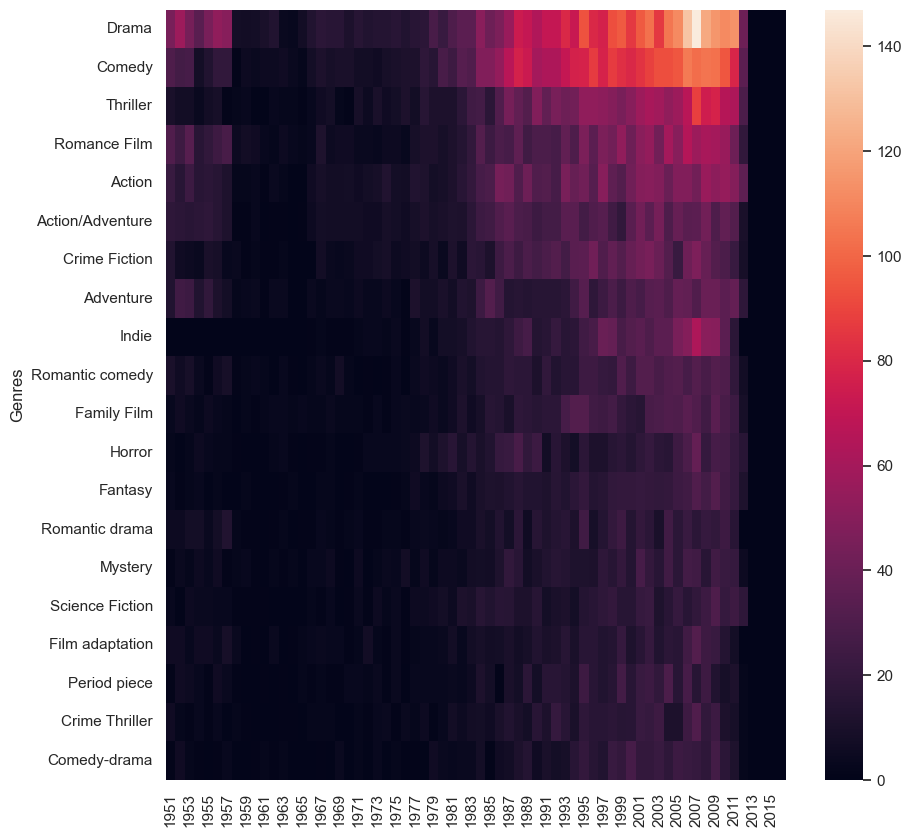

In [82]:
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United States of America" )].explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='count', fill_value=0)
d = tmp.apply(lambda x: sum(x), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
sns.heatmap(tmp)


<AxesSubplot:ylabel='Genres'>

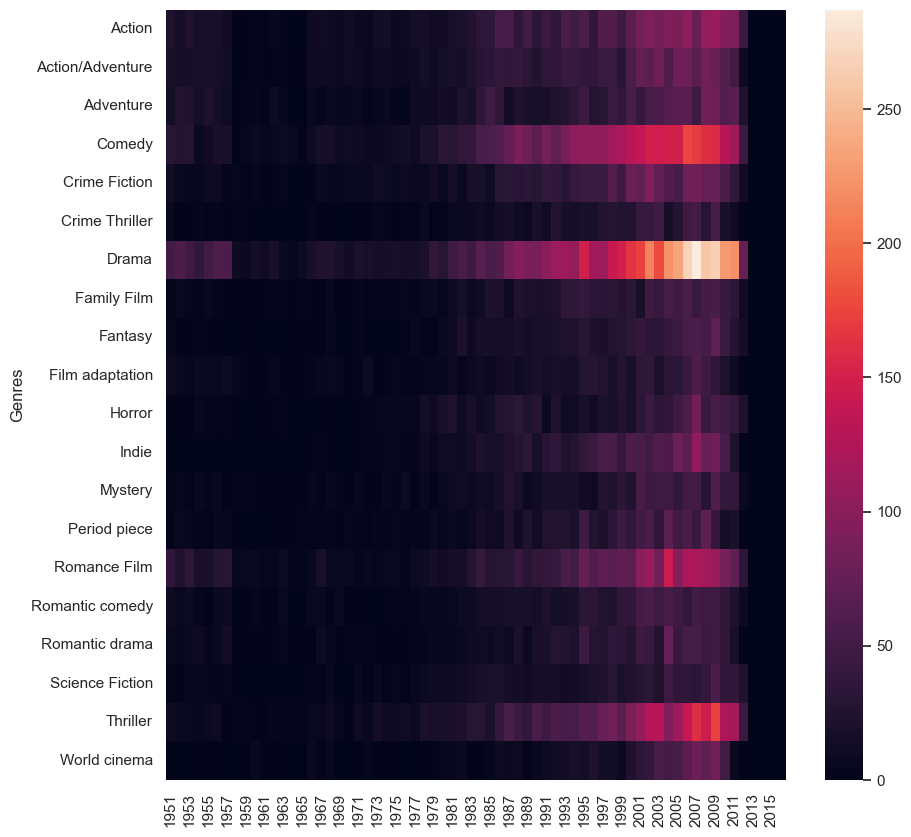

In [83]:
exploded = pruned.explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='count', fill_value=0)
d = tmp.apply(lambda x: x.sum(skipna=True), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
tmp = tmp.sort_index()
sns.heatmap(tmp)
#tmp

<AxesSubplot:ylabel='Genres'>

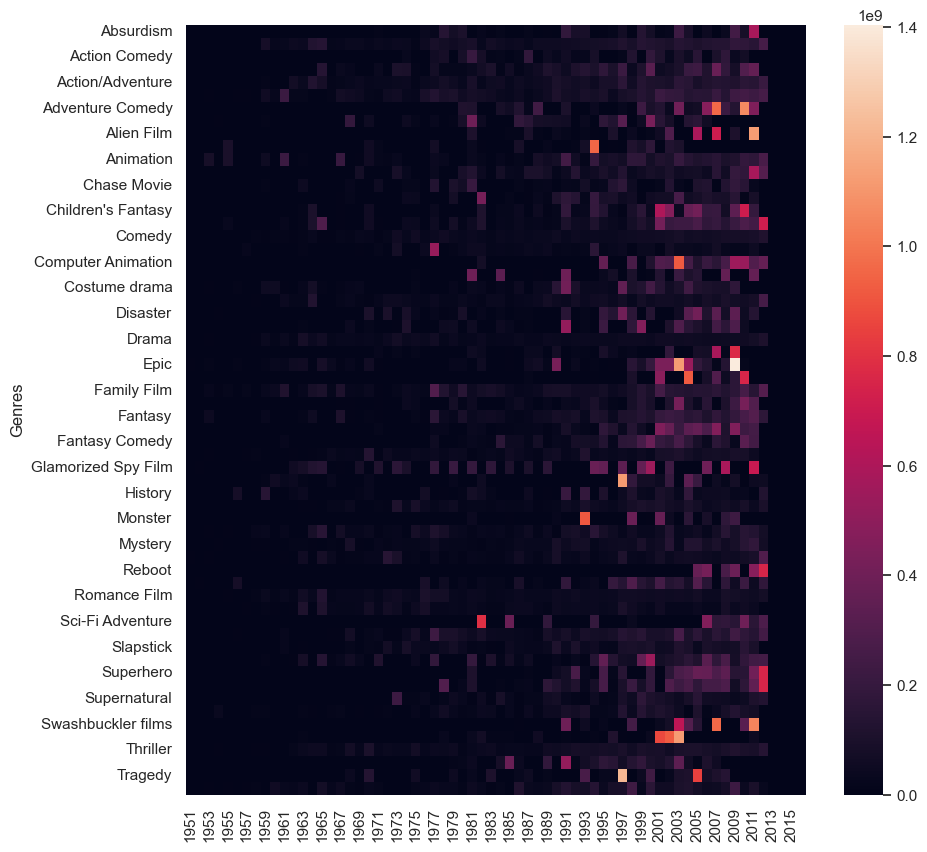

In [84]:
exploded = pruned.explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0, dropna=False)
d = tmp.apply(lambda x: x.sum(skipna=True), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(60, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
tmp = tmp.sort_index()
#tmp = tmp.loc[["Drama", "Comedy", "Romance Film"], :]
sns.heatmap(tmp)
#tmp


In [85]:
exploded[exploded["Genres"].apply(lambda x: x == "Comedy")]

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
5,13696889,/m/03cfc81,The Gangsters,1913,NaN,35.0,"[Silent film, English Language]",United States of America,Comedy
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],United States of America,Comedy
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,[Spanish Language],Argentina,Comedy
12,6631279,/m/0gffwj,Little city,1997,NaN,93.0,[English Language],United States of America,Comedy
17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,[English Language],United States of America,Comedy
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000,6944471.0,106.0,"[Italian Language, English Language]",France,Comedy
81725,1918494,/m/0660qx,State and Main,2000,6944471.0,106.0,"[Italian Language, English Language]",United States of America,Comedy
81729,15394941,/m/03m6zh4,Gopi Kishan,1994,NaN,NaN,[Hindi Language],India,Comedy
81733,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],United Kingdom,Comedy


In [86]:
exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0, dropna=False).loc["Comedy"]

Release
1888    0.000000e+00
1889    0.000000e+00
1890    0.000000e+00
1891    0.000000e+00
1892    0.000000e+00
            ...     
2012    1.171662e+08
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2016    0.000000e+00
Name: Comedy, Length: 129, dtype: float64

In [87]:
exploded["BoxRevenue"].dropna(axis=0)

0        14010832.0
0        14010832.0
0        14010832.0
0        14010832.0
0        14010832.0
            ...    
81726    22886222.0
81726    22886222.0
81726    22886222.0
81726    22886222.0
81726    22886222.0
Name: BoxRevenue, Length: 55443, dtype: float64

In [88]:
tmp.loc["Comedy"]

1951    1.925767e+06
1952    2.538462e+06
1953    3.561607e+06
1954    3.431250e+06
1955    4.580769e+06
            ...     
2012    1.171662e+08
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2016    0.000000e+00
Name: Comedy, Length: 66, dtype: float64